In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import label, binary_erosion 

In [2]:
img = cv2.imread("/mnt/e/Term 4/HW/HW8/images/q4/cells.png", cv2.IMREAD_GRAYSCALE)

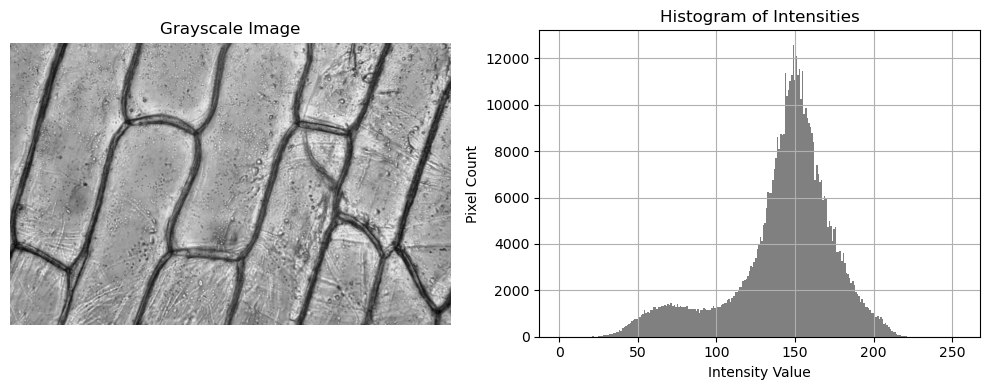

In [3]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Histogram of Intensities")
plt.hist(img.ravel(), bins=256, range=(0,255), color='gray')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [134]:
threshold_value = 90
binary_img = (img > threshold_value).astype(np.uint8)


(-0.5, 949.5, 607.5, -0.5)

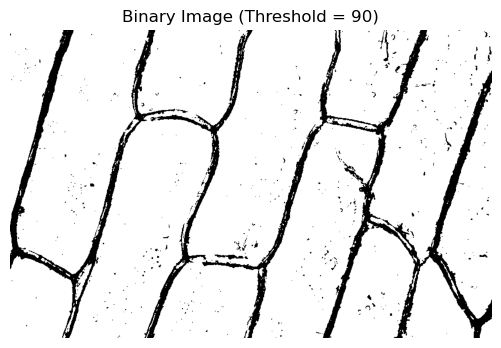

In [135]:
plt.figure(figsize=(10, 4))
plt.title(f'Binary Image (Threshold = {threshold_value})')
plt.imshow(binary_img, cmap='gray')
plt.axis('off')


In [136]:
seed_mask = 1 - binary_img

# Reduce seed regions to 1 pixel using erosion
structure = np.ones((3,3), dtype=np.uint8)  # 8-connectivity
labeled, num = label(seed_mask, structure=structure)

eroded = np.zeros_like(seed_mask, dtype=np.uint8)
for i in range(1, num+1):
    component = (labeled == i)
    # Apply erosion until one pixel remains
    while np.count_nonzero(component) > 1:
        component = binary_erosion(component, structure=structure, border_value=0)
    eroded[component] = 1

(-0.5, 949.5, 607.5, -0.5)

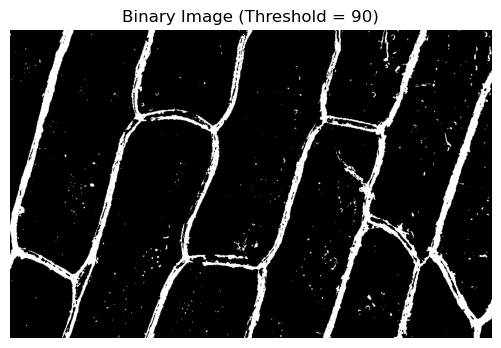

In [137]:
plt.figure(figsize=(10, 4))
plt.title(f'Binary Image (Threshold = {threshold_value})')
plt.imshow(seed_mask, cmap='gray')
plt.axis('off')


(-0.5, 949.5, 607.5, -0.5)

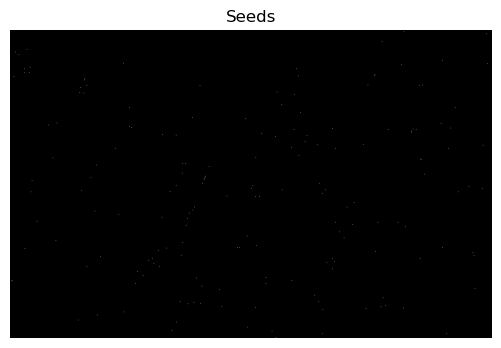

In [138]:
plt.figure(figsize=(10, 4))
plt.title(f'Seeds')
plt.imshow(eroded, cmap='gray')
plt.axis('off')

In [139]:
# Get seed coordinates
seed_coords = np.argwhere(eroded == 1)
seed_coords.shape

(176, 2)

In [140]:
# Region Growing
T = 45
visited = np.zeros_like(img, dtype=bool)
label_img = np.zeros_like(img, dtype=np.int32)
region_id = 1
H, W = img.shape
connectivity = [(-1,-1), (-1,0), (-1,1),
                ( 0,-1),        ( 0,1),
                ( 1,-1), ( 1,0), ( 1,1)]

for seed in seed_coords:
    x, y = seed
    if visited[x, y]: continue
    seed_val = img[x, y]
    queue = [(x, y)]
    while queue:
        cx, cy = queue.pop(0)
        if visited[cx, cy]: continue
        if abs(int(img[cx, cy]) - int(seed_val)) > T: continue
        visited[cx, cy] = True
        label_img[cx, cy] = region_id
        for dx, dy in connectivity:
            nx, ny = cx + dx, cy + dy
            if 0 <= nx < H and 0 <= ny < W and not visited[nx, ny]:
                queue.append((nx, ny))
    region_id += 1

In [141]:
# Color overlay on original image
color_output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
colors = [(255,0,0), (0,255,0), (0,0,255), (255,255,0), (0,255,255), (255,0,255)]
for i in range(1, region_id):
    mask = (label_img == i)
    color_output[mask] = colors[i % len(colors)]


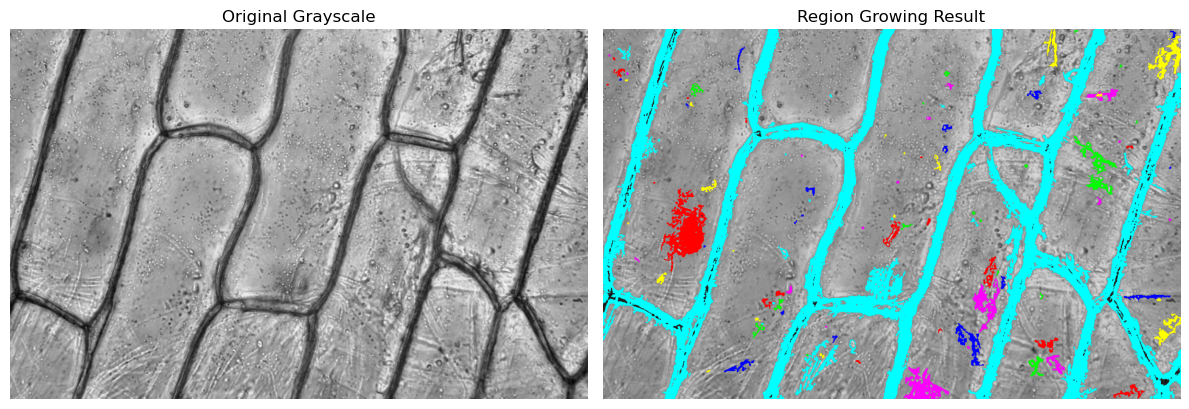

In [142]:
# Show final result
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original Grayscale')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Region Growing Result')
plt.imshow(color_output)
plt.axis('off')

plt.tight_layout()
plt.show()

In [143]:
len(np.unique(label_img))

109

___

In [144]:
threshold_value = 65
binary_img = (img > threshold_value).astype(np.uint8)

(-0.5, 949.5, 607.5, -0.5)

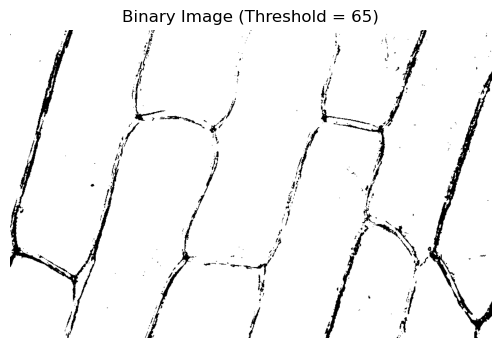

In [145]:
plt.figure(figsize=(10, 4))
plt.title(f'Binary Image (Threshold = {threshold_value})')
plt.imshow(binary_img, cmap='gray')
plt.axis('off')


In [146]:
seed_mask = binary_img

# Reduce seed regions to 1 pixel using erosion
structure = np.ones((3,3), dtype=np.uint8)  # 8-connectivity
labeled, num = label(seed_mask, structure=structure)

eroded = np.zeros_like(seed_mask, dtype=np.uint8)
for i in range(1, num+1):
    component = (labeled == i)
    # Apply erosion until one pixel remains
    while np.count_nonzero(component) > 1:
        component = binary_erosion(component, structure=structure, border_value=0)
    eroded[component] = 1

(-0.5, 949.5, 607.5, -0.5)

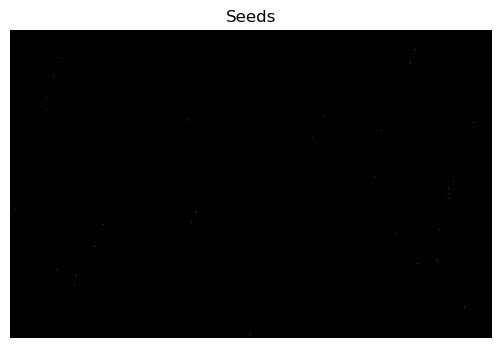

In [148]:
plt.figure(figsize=(10, 4))
plt.title(f'Seeds')
plt.imshow(eroded, cmap='gray')
plt.axis('off')

In [149]:
# Get seed coordinates
seed_coords = np.argwhere(eroded == 1)
seed_coords.shape

(31, 2)

In [150]:
# Region Growing
T = 55
visited = np.zeros_like(img, dtype=bool)
label_img = np.zeros_like(img, dtype=np.int32)
region_id = 1
H, W = img.shape
connectivity = [(-1,-1), (-1,0), (-1,1),
                ( 0,-1),        ( 0,1),
                ( 1,-1), ( 1,0), ( 1,1)]

for seed in seed_coords:
    x, y = seed
    if visited[x, y]: continue
    seed_val = img[x, y]
    queue = [(x, y)]
    while queue:
        cx, cy = queue.pop(0)
        if visited[cx, cy]: continue
        if abs(int(img[cx, cy]) - int(seed_val)) > T: continue
        visited[cx, cy] = True
        label_img[cx, cy] = region_id
        for dx, dy in connectivity:
            nx, ny = cx + dx, cy + dy
            if 0 <= nx < H and 0 <= ny < W and not visited[nx, ny]:
                queue.append((nx, ny))
    region_id += 1

In [153]:
# Color overlay on original image
color_output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
colors = [(255,0,0), (0,255,0), (0,0,255), (255,255,0), (0,255,255), (255,0,255)]
for i in range(1, region_id):
    mask = (label_img == i-1)
    color_output[mask] = colors[i % len(colors)]


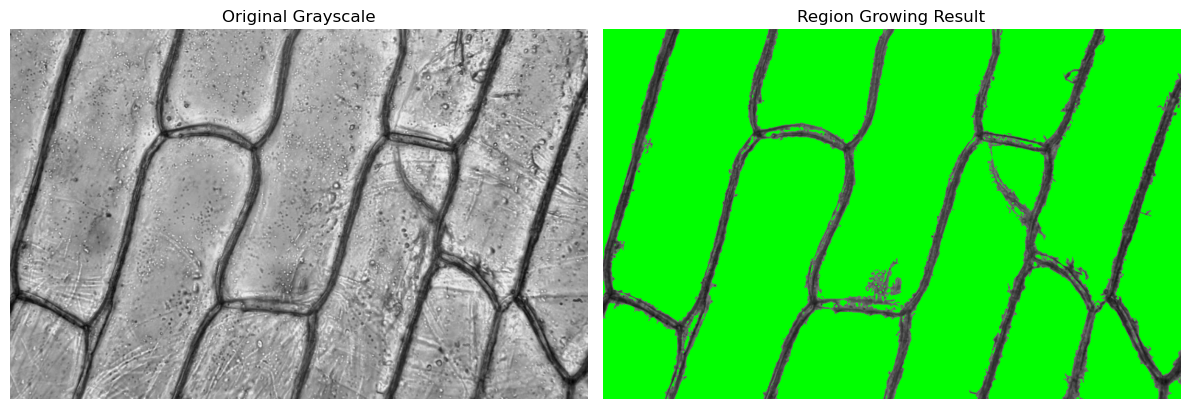

In [154]:
# Show final result
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original Grayscale')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Region Growing Result')
plt.imshow(color_output)
plt.axis('off')

plt.tight_layout()
plt.show()

___

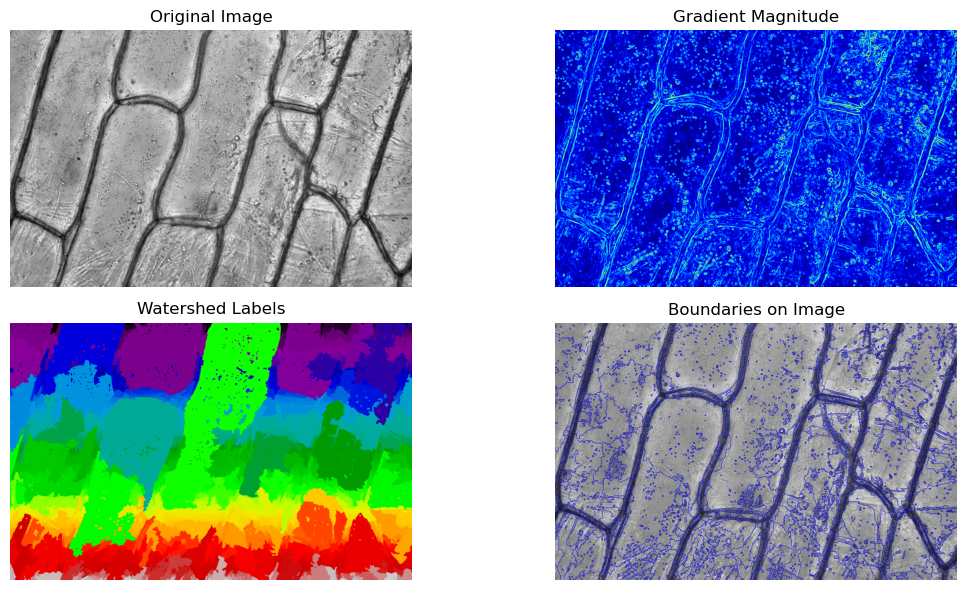

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed

# Load grayscale image
image = cv2.imread('images/q4/cells.png', cv2.IMREAD_GRAYSCALE)

# Compute gradient magnitude using Sobel filters
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
gradient_magnitude = (gradient_magnitude / gradient_magnitude.max() * 255).astype(np.uint8)

# Use distance transform to find seed points
ret, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
distance = cv2.distanceTransform(binary, cv2.DIST_L2, 5)

# Find local maxima as watershed markers
coordinates = peak_local_max(distance, footprint=np.ones((3, 3)), labels=binary)
local_maxi = np.zeros_like(distance, dtype=bool)
local_maxi[tuple(coordinates.T)] = True

# Label markers
markers, _ = ndi.label(local_maxi)

# Apply watershed algorithm on the gradient image
labels = watershed(gradient_magnitude, markers)

# Overlay watershed boundaries on original image
boundaries = cv2.Canny(labels.astype(np.uint8), 0, 1)
overlay = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
overlay[boundaries > 0] = [0, 0, 255]  

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='jet')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Watershed Labels')
plt.imshow(labels, cmap='nipy_spectral')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Boundaries on Image')
plt.imshow(overlay)
plt.axis('off')

plt.tight_layout()
plt.show()
